IDENTIFIKASI MASALAH

In [ ]:
# Problem definition
# Input  : Citra daun tanaman
# Output : Kelas daun (Sehat / Sakit)
# Method : Convolutional Neural Network (CNN)

PENGUMPULAN DATASET

In [ ]:
from google.colab import files
import zipfile
import os

# Ini akan membuka dialog unggah file. Pilih file zip dataset Anda.
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'File "{fn}" berhasil diunggah.')
  # Ekstrak file zip yang diunggah ke direktori 'dataset/'
  with zipfile.ZipFile(fn, 'r') as zip_ref:
    zip_ref.extractall('dataset/')
  print(f'Isi dari "{fn}" berhasil diekstrak ke direktori "dataset/".')

# Verifikasi isi direktori 'dataset/' setelah ekstraksi
print('\nIsi direktori dataset/ setelah ekstraksi:')
for root, dirs, files in os.walk('dataset/'):
    level = root.replace('dataset/', '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')


Saving dataset.zip to dataset.zip
File "dataset.zip" berhasil diunggah.
Isi dari "dataset.zip" berhasil diekstrak ke direktori "dataset/".

Isi direktori dataset/ setelah ekstraksi:
/
    dataset.zip
.ipynb_checkpoints/
dataset/
val/
    layu/
    sehat/
    bercak/
    jamur/
train/
    layu/
        layu.jpeg
    sehat/
        sehat.jpg
    bercak/
        bercak.jpeg
    jamur/
        jamur.jpeg
test/
    layu/
        layu01.jpeg
    sehat/
        sehat01.jpg
    bercak/
        bercak01.jpeg
    jamur/
        jamur01.jpeg


PREPROCESSING DATA

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 7 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


PERANCANGAN ARSITEKTUR MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Get the number of classes from the training data generator
num_classes = train_data.num_classes

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax') # Dynamically set based on actual classes
])

TRAINING MODEL

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.6225 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step - accuracy: 1.0000 - loss

EVALUASI MODEL

In [ ]:
loss, accuracy = model.evaluate(val_data)
print("Akurasi Model:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Akurasi Model: 1.0


PENGUJIAN MODEL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


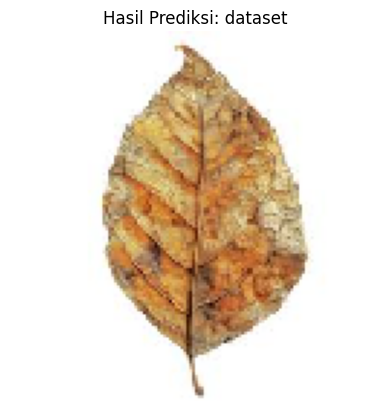

.ipynb_checkpoints: 0.0000
dataset: 1.0000


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path gambar uji (contoh dari folder test)
img_path = "dataset/dataset/test/layu/layu01.jpeg"

# Load dan preprocessing gambar
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediksi
prediction = model.predict(img_array)

# Dynamically get class names from the data generator
# This assumes train_data has already been run and its class_indices are available.
class_indices = train_data.class_indices
# Reverse the dictionary to get class names by index
idx_to_class = {v: k for k, v in class_indices.items()}
# Create a list of class names in the correct order (by index)
class_names = [idx_to_class[i] for i in range(len(idx_to_class))]

predicted_class = np.argmax(prediction, axis=1)
predicted_label = class_names[predicted_class[0]]

# Tampilkan gambar + hasil prediksi
plt.imshow(img)
plt.axis('off')
plt.title(f"Hasil Prediksi: {predicted_label}")
plt.show()

# Tampilkan probabilitas (opsional tapi bagus)
# Loop only for the number of classes the model actually outputs
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {prediction[0][i]:.4f}")

KESIMPULAN

In [ ]:
# Kesimpulan:
# Model CNN mampu mengklasifikasikan citra daun sehat dan sakit

# Pengembangan:
# - Menambah dataset
# - Menggunakan pretrained model (Transfer Learning)
# - Implementasi ke aplikasi web/mobile